In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read data

In [2]:
data=pd.read_csv("mtcars.csv")

In [3]:
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
data.tail()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [5]:
data.shape

(32, 12)

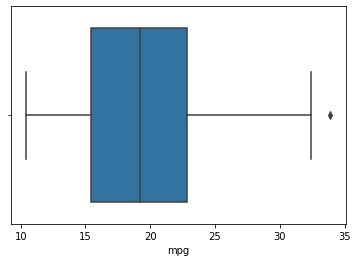

In [6]:
sns.boxplot(data['mpg'])

In [7]:
data=data.drop('model',axis=1)

In [8]:
data.shape

(32, 11)

In [9]:
data.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [10]:
data.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

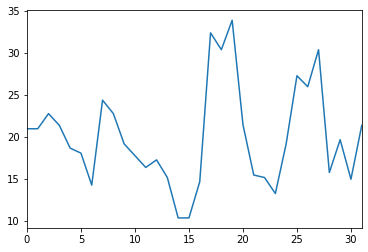

In [11]:
data['mpg'].plot()

In [12]:
data['mpg'].describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

## out liers (𝑄1−1.5(𝐼𝑄𝑅),𝑄3+1.5(𝐼𝑄𝑅))

In [13]:
## Outlier calculation , Q3+1.5IQR and Q1 - 1.5IQR 
Upper_limit = 22.800000 + 1.5 * (22.800000-15.425000)
Lower_limit = 15.425000 - 1.5 * (22.800000-15.425000)
print('Upper_limit :', Upper_limit)
print('Lower_limit :', Lower_limit)

Upper_limit : 33.8625
Lower_limit : 4.362500000000001


In [14]:
df1 = data[data['mpg']>33.8625]
print(df1.shape)
df2 = data[data['mpg']<4.3625]
print(df2.shape)

(1, 11)
(0, 11)


#### Removal of outliers

In [15]:
#data= data[data['mpg']<33.8625]

In [16]:
#data.shape

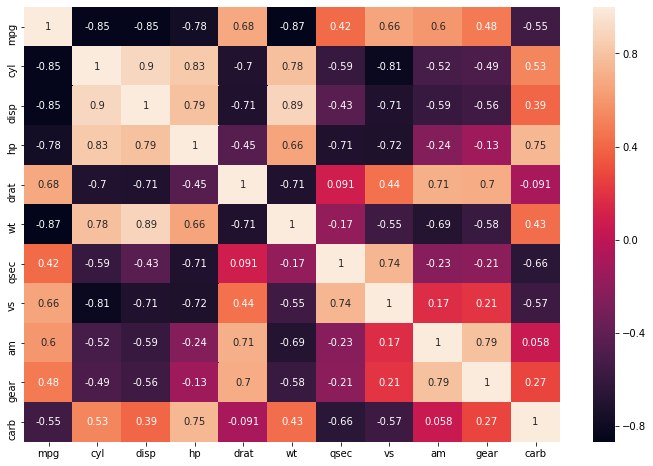

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

## Linear Regression base model

Now that the data is ready for analysis let us go ahead and fit the model.

In [18]:
X=data.drop('mpg',axis=1)
y=data['mpg']
from sklearn.linear_model import LinearRegression
LR= LinearRegression()
LR.fit(X,y)
print(f'Coefficients: {LR.coef_}')
print(f'Intercept: {LR.intercept_}')
print(f'R^2 score: {LR.score(X, y)}')

Coefficients: [-0.11144048  0.01333524 -0.02148212  0.78711097 -3.71530393  0.82104075
  0.31776281  2.52022689  0.65541302 -0.19941925]
Intercept: 12.30337415599627
R^2 score: 0.8690157644777646


## Split the data into train and test

In [19]:
from sklearn.model_selection import train_test_split
# train data - 70% and test data - 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(22, 10)
(10, 10)
(10,)


In [26]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')

y_pred=model.predict(X_test)
lin_reg.fit(X_test,y_pred)
print(f'R^2 score for test: {lin_reg.score(X_train, y_train)}')

R^2 score for train: 0.9180757361688419
R^2 score for test: 0.8594002315153396


#### overfit model r^2 of train is greater than r^2 of test

## Assumptions For linear Regression

#### Raw OLS Model

In [27]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           3.79e-07
Time:                        23:05:12   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Check the Asumptions of Linear Regression

For Linear Regression, we need to check if the 5 major assumptions hold.

1. No Auto correlation
2. Linearity of variables
3. Normality of error terms
4. No Heteroscedacity
5. No strong MultiCollinearity


## No auto-correlation

1) No Auto correlation. 

Test needed : Durbin- Watson Test.

- It's value ranges from 0-4. If the value of Durbin- Watson is Between 0-2, it's known as Positive Autocorrelation.
- If the value ranges from 2-4, it is known as Negative autocorrelation.
- If the value is exactly 2, it means No Autocorrelation.
- For a good linear model, it should have low or no autocorrelation.

we can see here the values of dublin watson test (test for normality): 1.861 
    
slightly there buy not evident

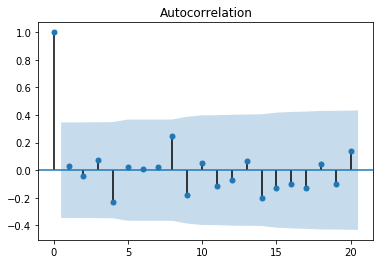

In [28]:
import statsmodels.tsa.api as smt
acf=smt.graphics.plot_acf(lin_reg.resid,lags=20,alpha=0.05)
acf.show()

### Residuals should be normally distributed

2) The second assumption is the Normality of Residuals / Error terms.

For this we prefer the Jarque Bera test. For a good model, the residuals should be normally distributed.
The higher the value of Jarque Bera test , the lesser the residuals are normally distributed.
We generally prefer a lower value of jarque bera test.

The Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. A large value for the jarque-bera test indicates non normality.
    
The jarque bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.
Note that this test generally works good for large enough number of data samples(>2000) as the test statistics asymptotically has a chi squared distribution with degrees 2 of freedom.

In [29]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

(1.746657601854837, 0.41755926155189804)


#### from this we gonna tell the p_value(Residuals should be normally distributed)>0.05 so the Residuals should be not normally distributed

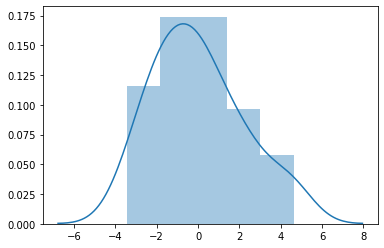

In [30]:
import seaborn as sns
sns.distplot(lin_reg.resid)

## Linearity of residuals
Here we have 2 options. Either we can plot the observed values Vs predicted values and plot the Residual Vs predicted values and see the linearity of residuals.
OR
We can go for rainbow test. Let's look both of them one by one.

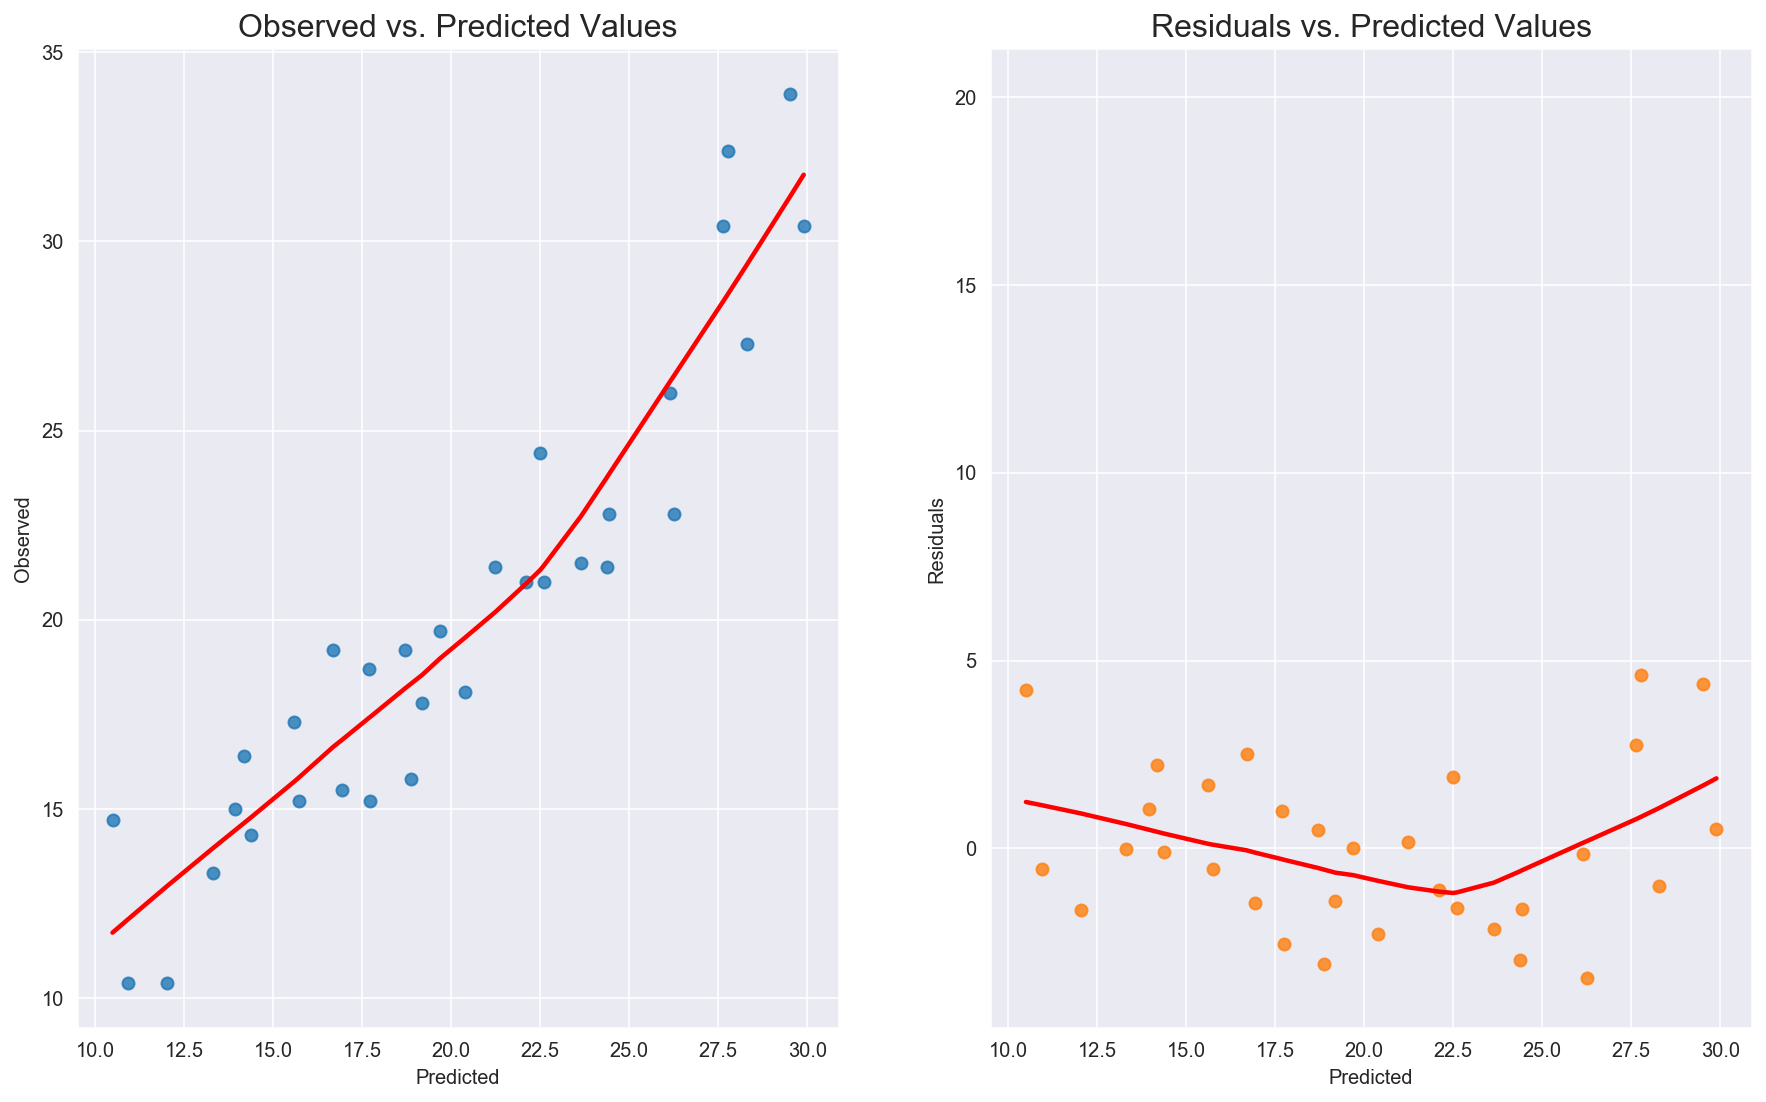

In [33]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

#### Rainbow test 

It is done to check the linearity of the residuals for a linear regression model.
Linearity of residuals is preferred.

In [34]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(3.857711147953156, 0.07119712038953646)

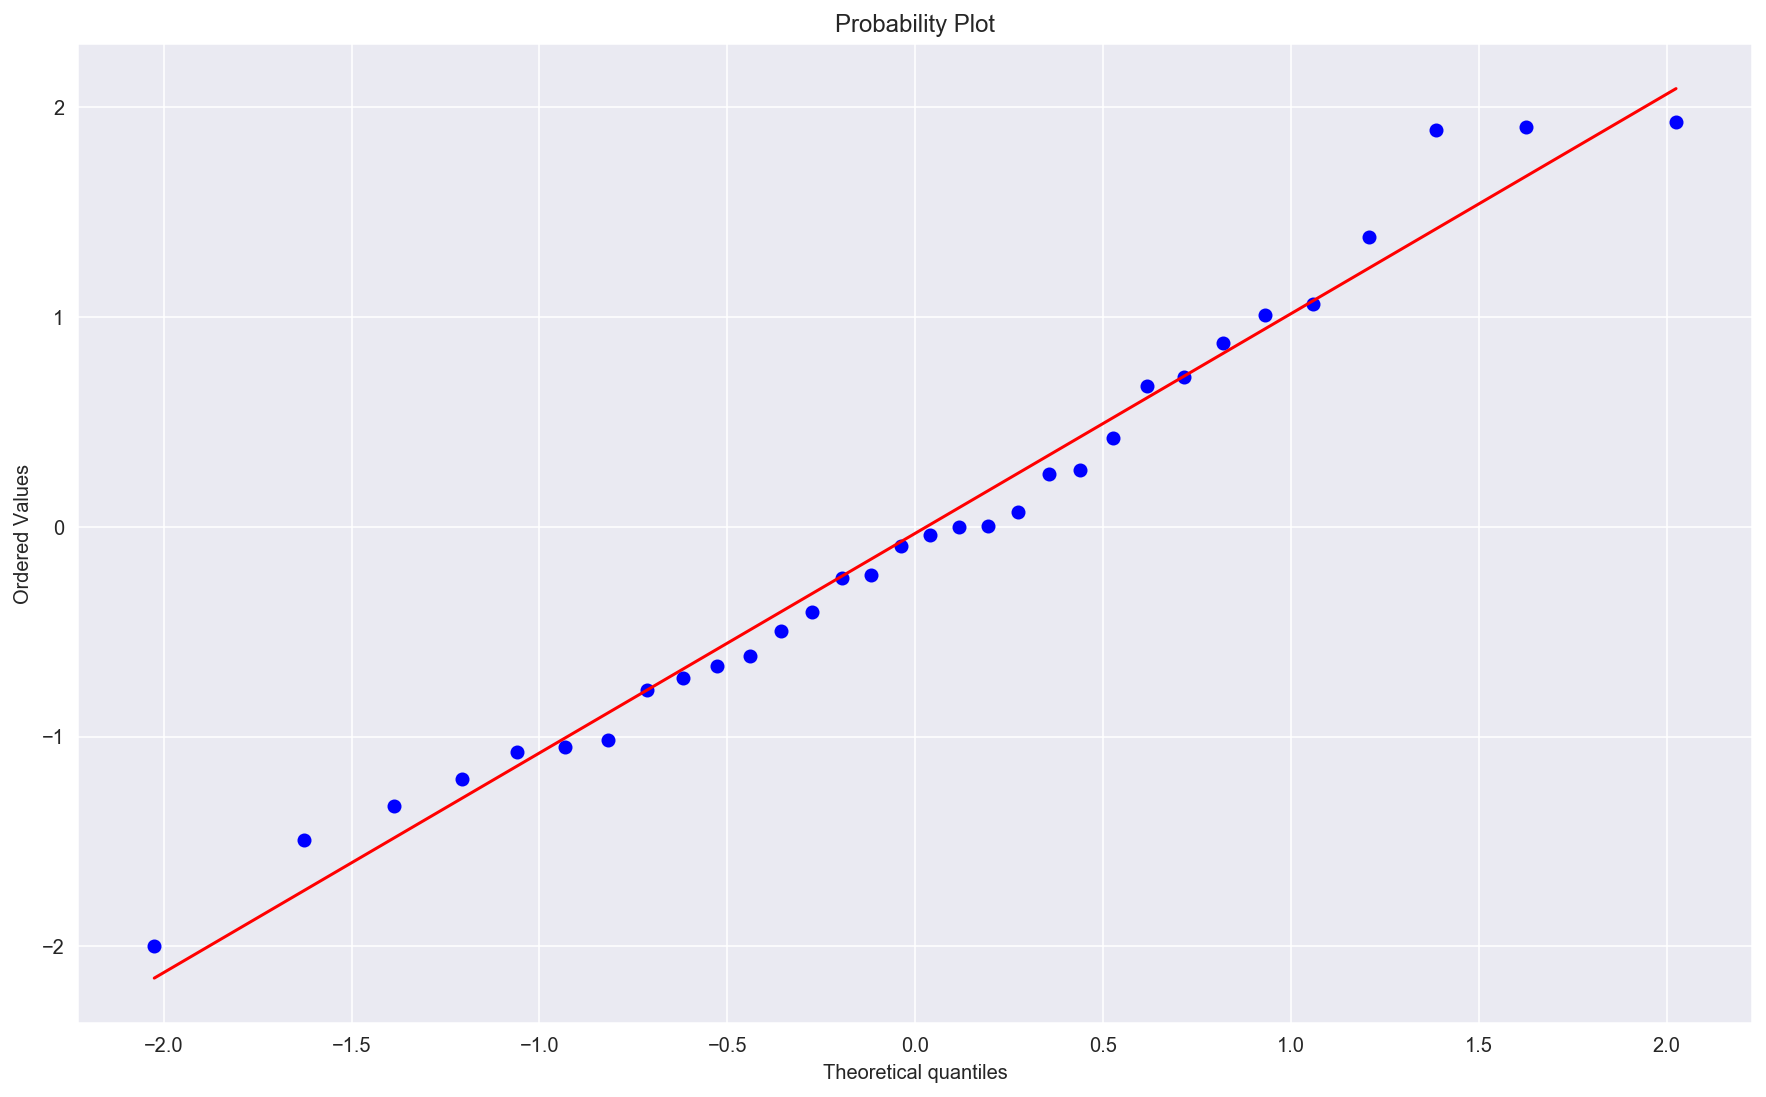

In [35]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

    EXPECTATION : THE MEAN VALUE OF THE RESIDUALS SHOULD BE ZERO.
    LET's CHECK

In [38]:
lin_reg.resid.mean()

2.1077584122508597e-13

Very much close to zero. 2.10* 10^(-13)

So, linearity is present.

## NO hetroscadisticty

##### Assumption 4 -  Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test)
Homoscedacity :: If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

Heteroscedacity :: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

This test is based on the hytpothesis testing where null and alternate hypothesis are:
$$ H_{0} : \sigma_{u_{i}}~is~constant~across~the~range~of~data $$

$$ H_{a} : \sigma_{u_{i}}~is~not~constant~across~the~range~of~data $$

The residuals should be homoscedastic.


##### Goldfeld Test

[('F statistic', 28.86399304089), ('p-value', 0.0010748981447214628)]

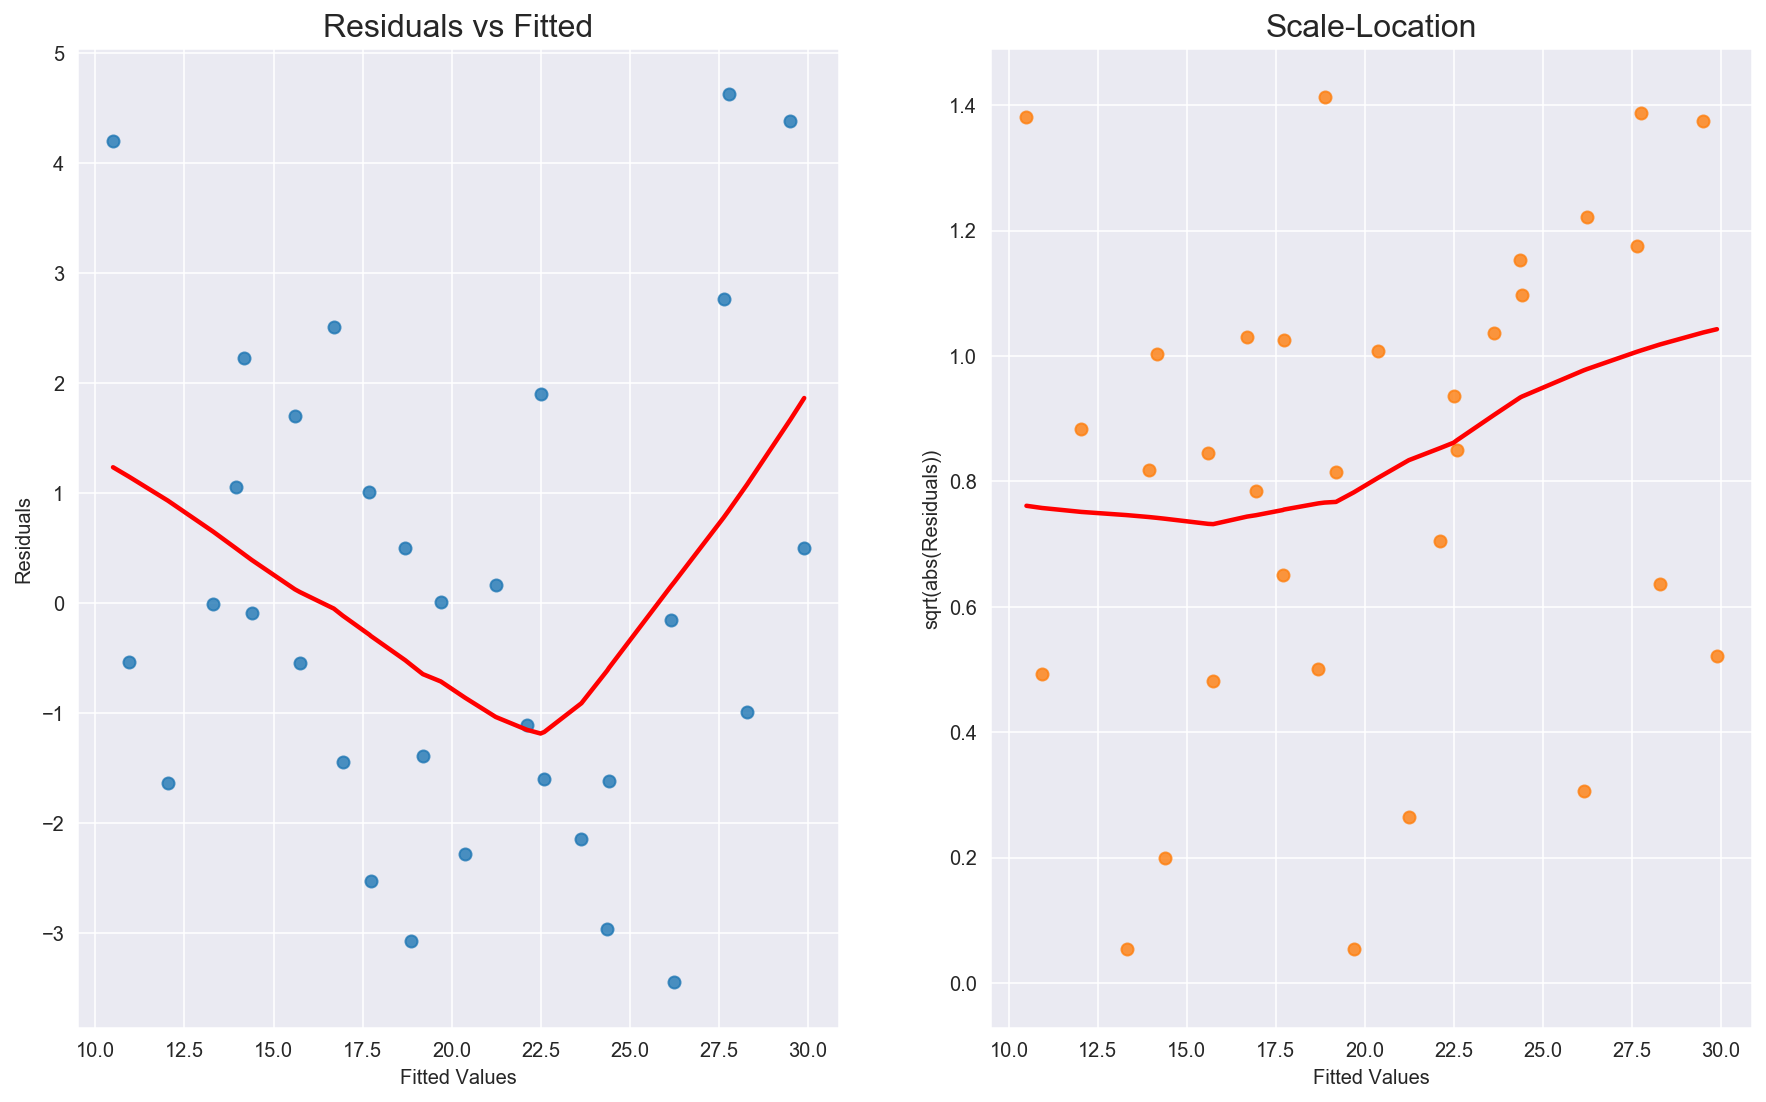

In [39]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

We can also use two statistical tests: Breusch-Pagan and Goldfeld-Quandt. In both of them the null hypothesis assumes  homoscedasticity and a p-value below a certain level (like 0.05) indicates we should reject the null in favor of heteroscedasticity.

Here, p value is less than 0.05 so, it is hetroscedastici distribution.

$$ H_{0} : \sigma_{u_{i}}~is~constant~across~the~range~of~data $$

$$ H_{a} : \sigma_{u_{i}}~is~not~constant~across~the~range~of~data $$

## NO  MULTI COLLINEARITY

The interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. If no features are correlated, then all values for VIF will be 1.

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
vif,15.373833,21.620241,9.832037,3.37462,15.164887,7.527958,4.965873,4.648487,5.357452,7.908747


So, multicollinearity exists.

Note : This vif column has be built with the help of X_constant and not the X_values. Because we built our model by adding Constant.

In [44]:
data.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [46]:
##  removed like correlated variables
X = data[['cyl','hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear','carb']]
y = data['mpg']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [ 0.09626514 -0.0129498   0.92863866 -2.62694278  0.66523397  0.16035155
  2.47881882  0.74299607 -0.61685611]
Intercept: 12.550524010059805
R^2 score: 0.8655375202824598


In [47]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     15.73
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           1.18e-07
Time:                        23:42:44   Log-Likelihood:                -70.274
No. Observations:                  32   AIC:                             160.5
Df Residuals:                      22   BIC:                             175.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5505     18.526      0.677      0.505     -25.870      50.971
cyl            0.0963      0.997      0.097      0.924      -1.972       2.164
hp            -0.0129      0.018     -0.706      0.488      -0.051       0.025
drat           0.9286      1.608      0.578      0.569      -2.406       4.263
wt            -2.6269      1.198     -2.193      0.039      -5.111      -0.142
qsec           0.6652      0.693      0.959      0.348      -0.773       2.103
vs             0.1604      2.073      0.077      0.939      -4.138       4.459
am             2.4788      2.035      1.218      0.236      -1.742       6.699
gear           0.7430      1.474      0.504      0.619      -2.313       3.799
carb          -0.6169      0.606     -1.018      0.320      -1.873       0.639
==============================================================================
Omnibus:                        1.268   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.531   Jarque-Bera (JB):                1.227
Skew:                           0.405   Prob(JB):                        0.541
Kurtosis:                       2.486   Cond. No.                     6.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""